<a href="https://colab.research.google.com/github/URAM-KOR/vgames2/blob/main/AI_05_%EA%B9%80%EC%9A%B0%EB%9E%8C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

                     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                               
Action        1999.366132  0.258142  0.155809  0.047340     0.056009
Adventure     2001.908661  0.081953  0.049891  0.040523     0.012914
Fighting      1990.491018  0.261913  0.117828  0.101535     0.042668
Misc          1995.529032  0.232843  0.120842  0.060467     0.042434
Platform      1985.735698  0.499118  0.219446  0.146900     0.057704
Puzzle        1977.024691  0.212664  0.087059  0.098391     0.021574
Racing        1988.617213  0.277747  0.189107  0.045149     0.061689
Role-Playing  1996.148022  0.214390  0.122704  0.224659     0.037316
Shooter       1987.249219  0.435344  0.234572  0.029220     0.077913
Simulation    1994.783274  0.207769  0.129757  0.072162     0.036312
Sports        1996.832971  0.285523  0.159180  0.057206     0.057010
Strategy      1990.970149  0.099485  0.066471  0.071206     0.016250


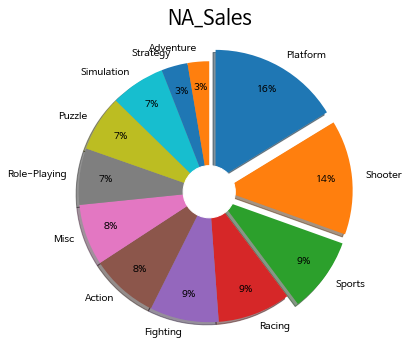

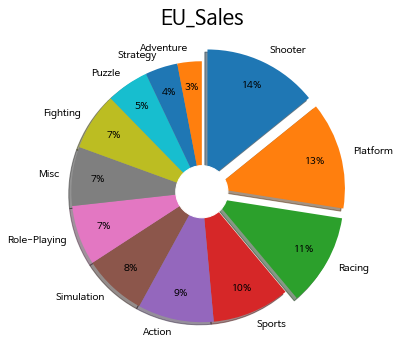

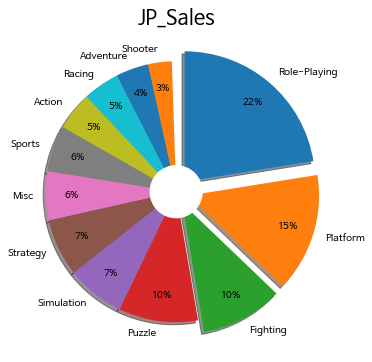

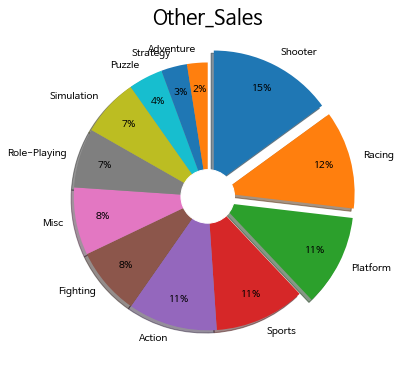

Genre
Shooter         0.077913
Racing          0.061689
Platform        0.057704
Sports          0.057010
Action          0.056009
Fighting        0.042668
Misc            0.042434
Role-Playing    0.037316
Simulation      0.036312
Puzzle          0.021574
Strategy        0.016250
Adventure       0.012914
Name: Other_Sales, dtype: float64


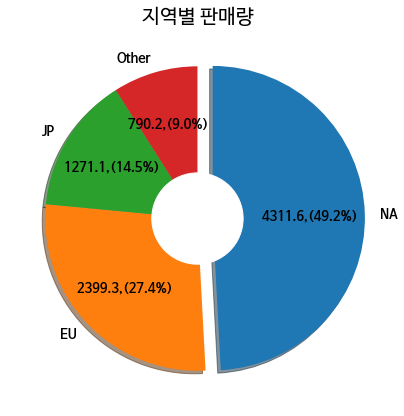

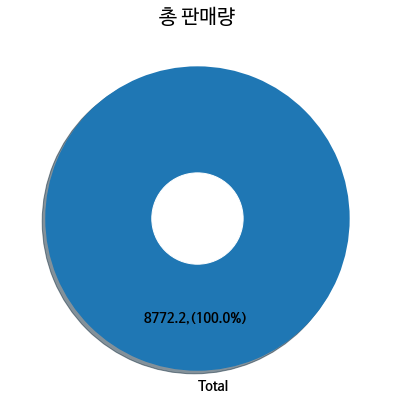

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
df_nara = df.groupby('Genre').mean()  # Genre 별 합 
print(df_nara)
df_nara['Genre'] = df_nara.index
df_na = df_nara.sort_values(by = ['NA_Sales'], ascending = False)  # 나라별 내림차순
df_eu = df_nara.sort_values(by = ['EU_Sales'], ascending = False)
df_jp = df_nara.sort_values(by = ['JP_Sales'], ascending = False)
df_other = df_nara.sort_values(by = ['Other_Sales'], ascending = False)


# 원형그래프
# NA_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_na['NA_Sales'],
        labels=df_na['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('NA_Sales', fontsize=20)
plt.show()

# EU_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_eu['EU_Sales'],
        labels=df_eu['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('EU_Sales', fontsize=20)
plt.show()

# JP_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_jp['JP_Sales'],
        labels=df_jp['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('JP_Sales', fontsize=20)
plt.show()

# Other_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,7))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_other['Other_Sales']*100,
        labels=df_other['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8,
        counterclock= 0)
plt.title('Other_Sales', fontsize=20)
plt.show()
print(df_other['Other_Sales'])


#########################################################
# 원형그래프
# Sales rate

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.figure(figsize=(7,7))
plt.gca().add_artist(centre_circle)
values = df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum(),df['Other_Sales'].sum(),
plt.pie(explode = (0.1,0,0,0.0),
        x = [df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum(),df['Other_Sales'].sum()],
        labels=['NA','EU','JP','Other'], 
        shadow=True, 
        startangle=90, 
        autopct = (lambda p:f'{p*sum(values)/100 :.1f},({p:.1f}%) '),     
        pctdistance=0.65 ,
        textprops=dict(color='k', weight='bold', fontsize=13), 
        counterclock= 0)
plt.title('지역별 판매량', fontsize=20)
plt.show()

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.figure(figsize=(7,7))
plt.gca().add_artist(centre_circle)
values2 = df['NA_Sales'].sum()+df['EU_Sales'].sum()+df['JP_Sales'].sum()+df['Other_Sales'].sum(),
plt.pie(
        x = [df['NA_Sales'].sum()+df['EU_Sales'].sum()+df['JP_Sales'].sum()+df['Other_Sales'].sum()],
        labels=['Total'], 
        shadow=True, 
        startangle=90, 
        autopct = (lambda p:f'{p*sum(values2)/100 :.1f},({p:.1f}%) '),     
        pctdistance=0.65 ,
        textprops=dict(color='k', weight='bold', fontsize=13), 
        counterclock= 0)
plt.title('총 판매량', fontsize=20)
plt.show()


연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

a <= Year <= b
a 입력하세요
b 입력하세요


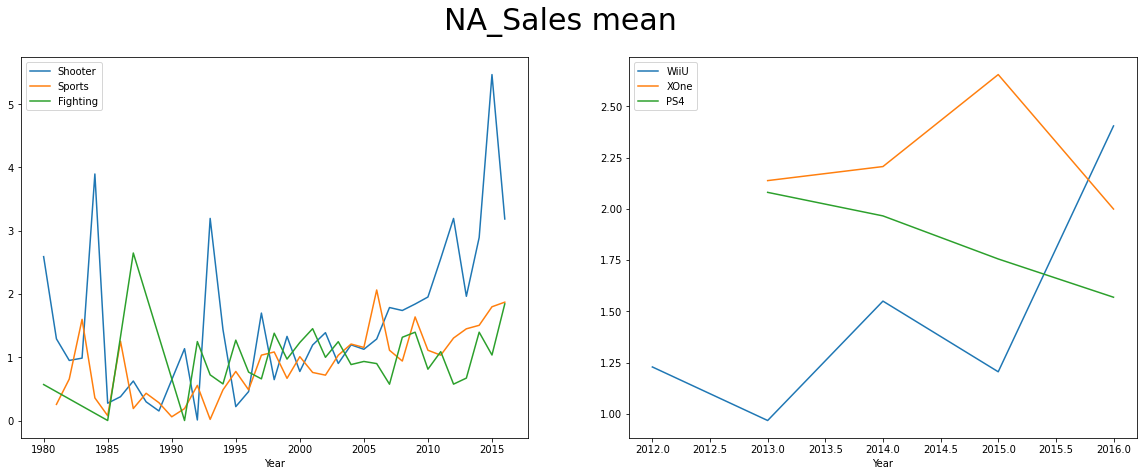

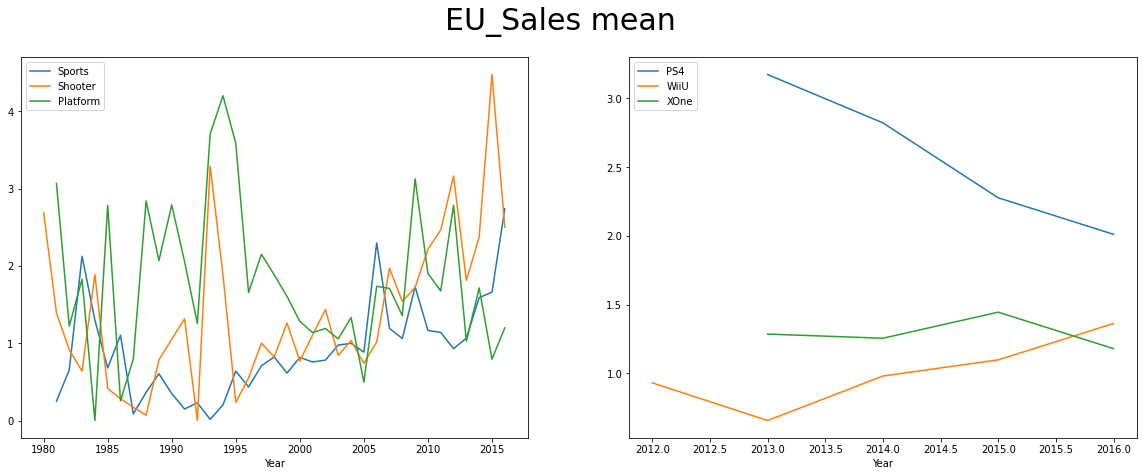

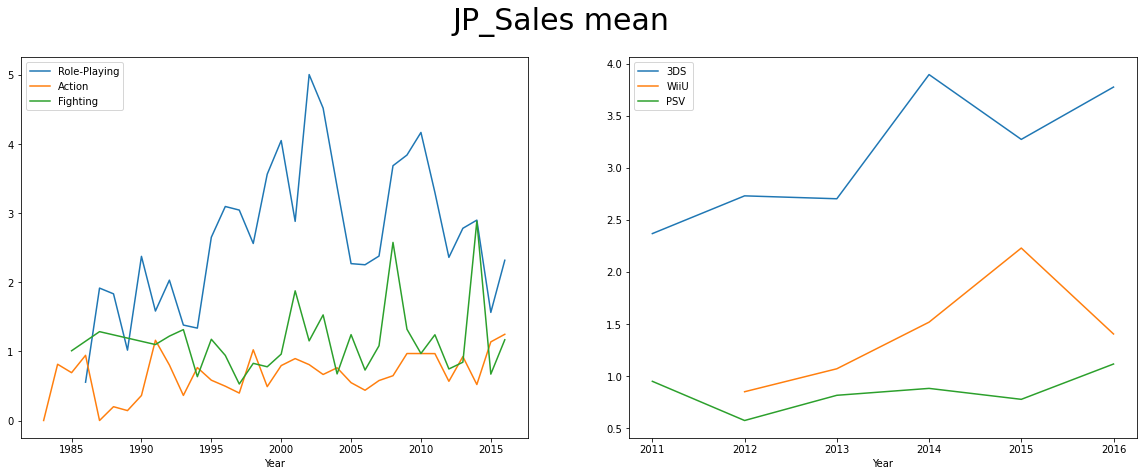

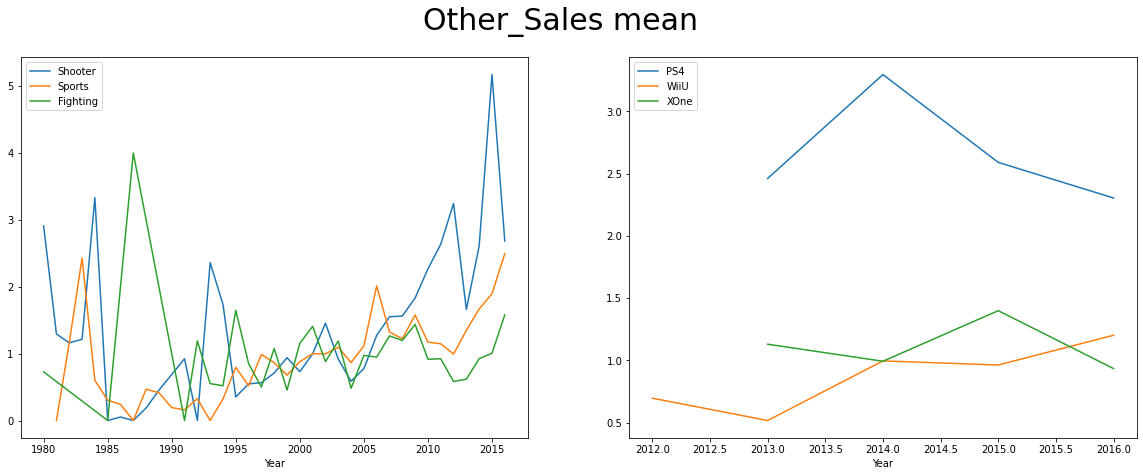

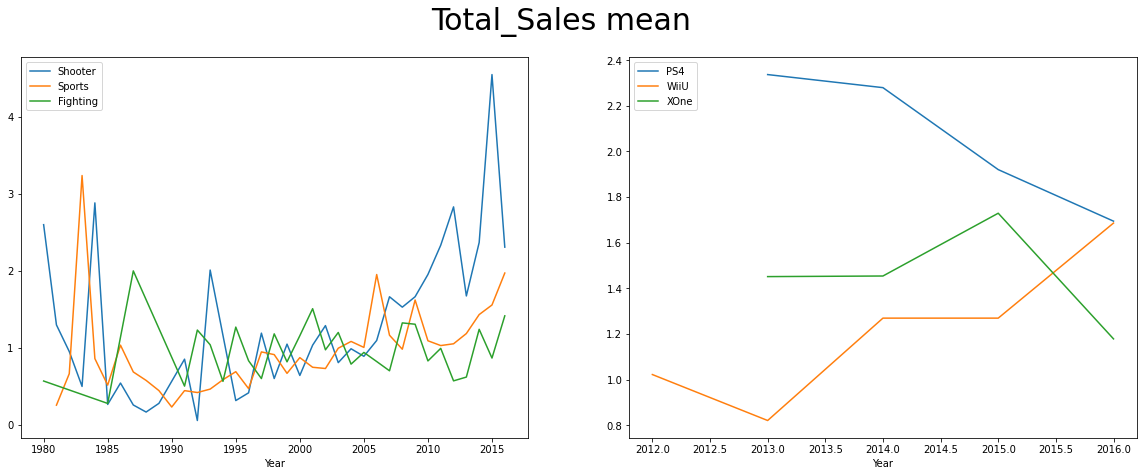

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
print('a <= Year <= b')
print('a 입력하세요')
a = int(1000)
print('b 입력하세요')
b = int(2016)
df[(df['Year'] < a )] = np.nan    # Year < 1000  =>  nan
df[(df['Year'] > b )] = np.nan    # Year > 1000  =>  nan
df = df.dropna(subset = ['Year'])  # Year 열 결측치 삭제
df = df.dropna(subset = ['Genre'])  # Genre 열 결측치 삭제
df = df.sort_values(by = ['Year'], ascending = True) # 연도별 오름차순
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_N = df
df = df.drop(['Name','Publisher'],axis=1)
# df['Year'] = pd.to_datetime(df['Year'], format = '%Y')  # Year 을 datetime64 형식으로 변환
df_G = df.groupby(['Year','Genre']).mean().reset_index()  # Year, Genre 별 평균
df_Y = df.groupby(['Year']).mean().reset_index()  # Year 별 평균 
df_P = df.groupby(['Year','Platform']).mean().reset_index()  # Year, Genre 별 평균
df_G = pd.merge(df_G,df_Y,how='left',on='Year')   
df_P = pd.merge(df_P,df_Y,how='left',on='Year')


#top3 함수정의
def top(df,col2,col1):   #df 에서 'col2' 별 'col1' 값의 top3 'series'반환
    A = (df[(df['Year'] == b)].sort_values(col1,ascending = False)[col2].head(3))
    C=[]
    for i in A:
        B = pd.DataFrame(df[df[col2]==i])
        C.append(B)
    return pd.concat(C)

    
df_G_N = top(df_G,'Genre','NA_Sales_x')
df_P_N = top(df_P,'Platform','NA_Sales_x')
df_G_E = top(df_G,'Genre','EU_Sales_x')
df_P_E = top(df_P,'Platform','EU_Sales_x')
df_G_J = top(df_G,'Genre','JP_Sales_x')
df_P_J = top(df_P,'Platform','JP_Sales_x')
df_G_O = top(df_G,'Genre','Other_Sales_x')
df_P_O = top(df_P,'Platform','Other_Sales_x')
df_G_T = top(df_G,'Genre','Total_x')
df_P_T = top(df_P,'Platform','Total_x')


#NA_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('NA_Sales mean', size = 30)

sns.lineplot(x=df_G_N['Year'], y=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'], data=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'],
             hue=df_G_N['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_N['Year'], y=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'], data=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'],
             hue=df_P_N['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#EU_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('EU_Sales mean', size = 30)

sns.lineplot(x=df_G_E['Year'], y=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'], data=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'],
             hue=df_G_E['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_E['Year'], y=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'], data=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'],
             hue=df_P_E['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#JP_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('JP_Sales mean', size = 30)

sns.lineplot(x=df_G_J['Year'], y=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'], data=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'],
             hue=df_G_J['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_J['Year'], y=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'], data=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'],
             hue=df_P_J['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#Other_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Other_Sales mean', size = 30)


sns.lineplot(x=df_G_O['Year'], y=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'], data=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'],
             hue=df_G_O['Genre'],
             ax=axes[0],
             legend = 'auto')
sns.lineplot(x=df_P_O['Year'], y=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'], data=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'],
             hue=df_P_O['Platform'],
             ax=axes[1],
             legend = 'auto',
             sizes=(.25, 2.5))
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales mean', size = 30)

sns.lineplot(x=df_G_T['Year'], y=df_G_T['Total_x']/df_G_T['Total_y'], data=df_G_T['Total_x']/df_G_T['Total_y'],
             hue=df_G_T['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_T['Year'], y=df_P_T['Total_x']/df_P_T['Total_y'], data=df_P_T['Total_x']/df_P_T['Total_y'],
             hue=df_P_T['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

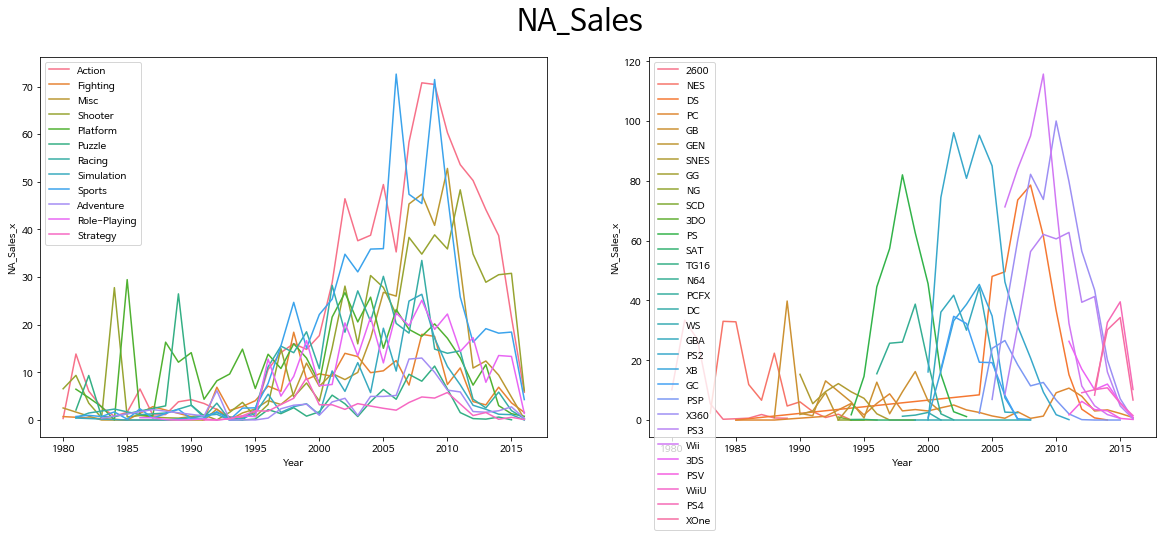

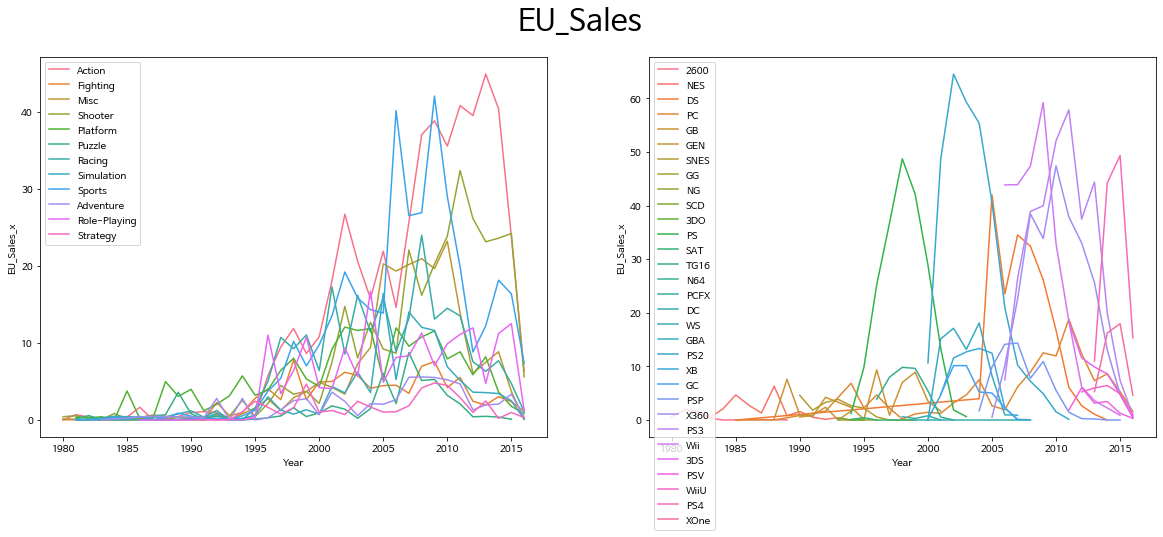

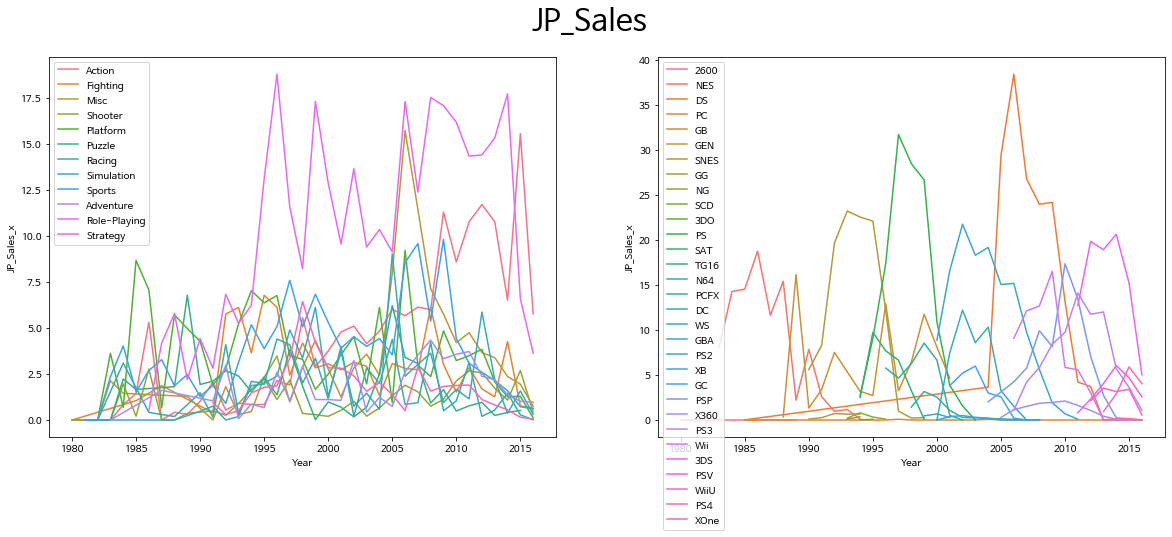

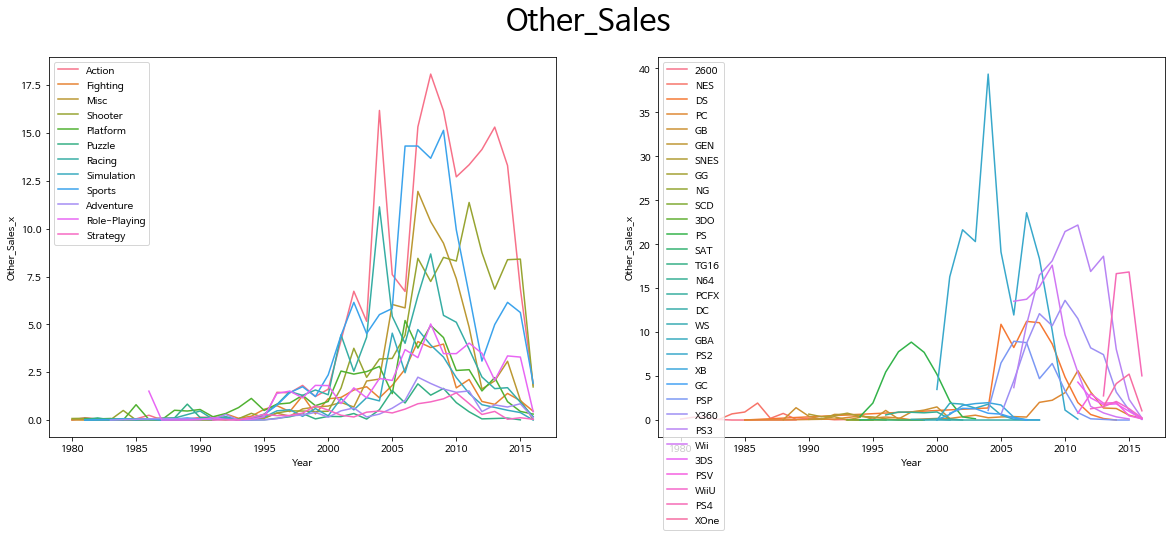

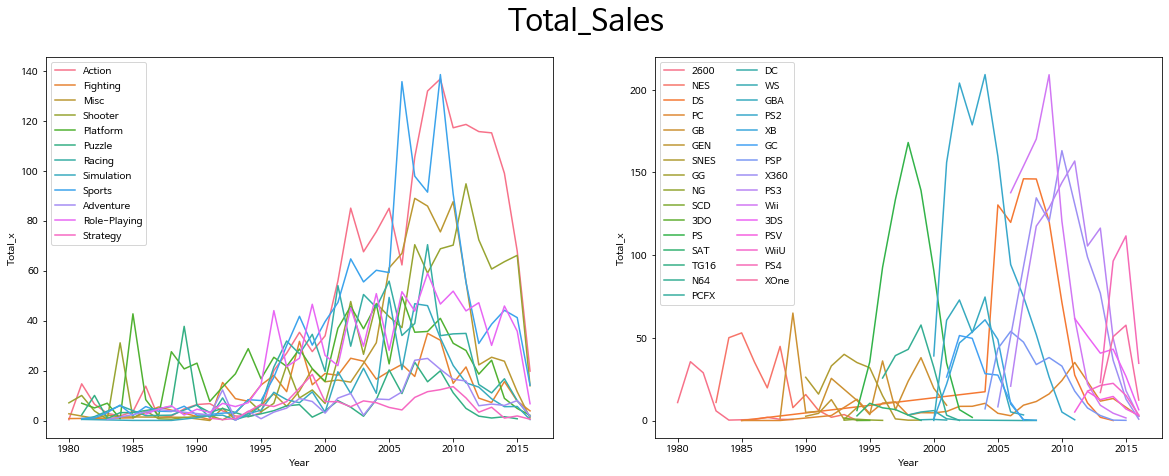

In [182]:
df_G = df.groupby(['Year','Genre']).sum().reset_index()  # Year, Genre 별 합
df_Y = df.groupby(['Year']).sum().reset_index()  # Year 별 합 
df_P = df.groupby(['Year','Platform']).sum().reset_index()  # Year, Genre 별 합
df_G = pd.merge(df_G,df_Y,how='left',on='Year')   
df_P = pd.merge(df_P,df_Y,how='left',on='Year')

#NA_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('NA_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['NA_Sales_x'], data=df_G['NA_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['NA_Sales_x'], data=df_P['NA_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#EU_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('EU_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['EU_Sales_x'], data=df_G['EU_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['EU_Sales_x'], data=df_P['EU_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#JP_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('JP_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['JP_Sales_x'], data=df_G['JP_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['JP_Sales_x'], data=df_P['JP_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#Other_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Other_Sales', size = 30)


sns.lineplot(x=df_G['Year'], y=df_G['Other_Sales_x'], data=df_G['Other_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')
sns.lineplot(x=df_P['Year'], y=df_P['Other_Sales_x'], data=df_P['Other_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto',
             sizes=(.25, 2.5))
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['Total_x'], data=df_G['Total_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['Total_x'], data=df_P['Total_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left',ncol=2 )

plt.show()
print('''

''')



                   NA_Sales  EU_Sales  JP_Sales  Other_Sales     Total  NA_rank  EU_rank  JP_rank  Other_rank
Year   Genre                                                                                                 
1980.0 Action      0.320000  0.020000       0.0     0.000000  0.340000      4.0      4.0      4.0         4.0
       Fighting    0.720000  0.040000       0.0     0.010000  0.770000      2.0      2.0      4.0         2.0
       Misc        0.632500  0.037500       0.0     0.005000  0.675000      3.0      3.0      4.0         3.0
       Shooter     3.280000  0.215000       0.0     0.040000  3.535000      1.0      1.0      4.0         1.0
1981.0 Action      0.554400  0.028000       0.0     0.004800  0.587200      4.0      5.0      7.0         4.0
       Platform    2.156667  0.123333       0.0     0.026667  2.306667      1.0      1.0      7.0         1.0
       Puzzle      1.045000  0.065000       0.0     0.015000  1.125000      2.0      2.0      7.0         2.0
       Rac

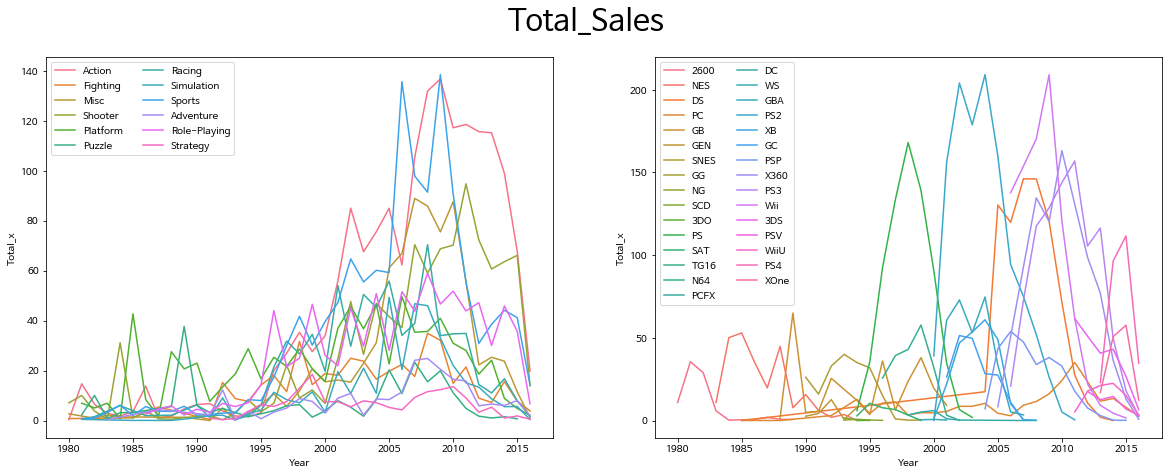




             NA_rank   EU_rank   JP_rank  Other_rank
NA_rank     1.000000  0.855936  0.303601    0.832614
EU_rank     0.855936  1.000000  0.257057    0.889000
JP_rank     0.303601  0.257057  1.000000    0.336723
Other_rank  0.832614  0.889000  0.336723    1.000000
95% 신뢰구간:  nan nan
nan
95% 신뢰구간:  1998.543928659606 2005.7417856261081
7.197856966502059
95% 신뢰구간:  1982.3341494103865 1986.6658505896135
4.331701179226911
95% 신뢰구간:  2002.1611686229653 2011.8388313770347
9.677662754069388
95% 신뢰구간:  2008.771861148035 2013.228138851965
4.456277703930027
95% 신뢰구간:  nan nan
nan
95% 신뢰구간:  2003.209142013463 2007.790857986537
4.581715973074097
95% 신뢰구간:  2001.89491586257 2006.10508413743
4.210168274859825
95% 신뢰구간:  nan nan
nan
95% 신뢰구간:  1997.00210484163 2000.99789515837
3.9957903167401128
95% 신뢰구간:  2012.445739743239 2016.554260256761
4.108520513521853
95% 신뢰구간:  1987.146897631784 1999.853102368216
12.706204736432028
95% 신뢰구간:  1999.6746339049985 2006.4792122488477
6.8045783438492435
95% 신뢰구

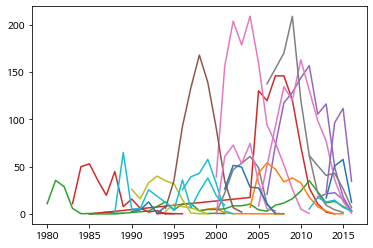

In [228]:
df_N['NA_rank'] = df_N['NA_Sales'].rank(method = 'min', ascending = False)
df_N['EU_rank'] = df_N['EU_Sales'].rank(method = 'min', ascending = False)
df_N['JP_rank'] = df_N['JP_Sales'].rank(method = 'min', ascending = False)
df_N['Other_rank'] = df_N['Other_Sales'].rank(method = 'min', ascending = False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
# print(df_N.sort_values('NA_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('EU_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('JP_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('Other_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
df3 = df.groupby(['Year','Genre']).mean()
df3 = df3.reset_index()
i = 1980



# rank

######### Genre ############

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

while i <= b:    
    NA_rank = pd.concat([NA_rank,df3[(df3['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df3[(df3['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df3[(df3['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df3[(df3['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df3['NA_rank'] = NA_rank
df3['EU_rank'] = EU_rank
df3['JP_rank'] = JP_rank    
df3['Other_rank'] = Other_rank

#F-stat by scipy
from scipy.stats import f_oneway
f_oneway(NA_rank, EU_rank, JP_rank, Other_rank) 

#CI with scipy
from scipy.stats import t

sample = df3[['NA_rank','EU_rank','JP_rank','Other_rank']]
print(df3.groupby(['Year','Genre']).sum().head(20))
# 표본의 크기
n = len(sample)
# 자유도
dof = n-1
# 평균의 평균
mean = np.mean(sample)
# 표본의 표준편차
sample_std = np.std(sample, ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)
CI = t.interval(.95, dof, loc = mean, scale = std_err)
print("95% 신뢰구간: ", mean, CI)

print(sample.corr())


######### Platform ############

df4 = df.groupby(['Year','Platform']).mean()
df4 = df4.reset_index()

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

i = 1980
while i <= b:    
    NA_rank = pd.concat([NA_rank,df4[(df4['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df4[(df4['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df4[(df4['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df4[(df4['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df4['NA_rank'] = NA_rank
df4['EU_rank'] = EU_rank
df4['JP_rank'] = JP_rank    
df4['Other_rank'] = Other_rank

sample = df4[['NA_rank','EU_rank','JP_rank','Other_rank']]

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['Total_x'], data=df_G['Total_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['Total_x'], data=df_P['Total_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left', ncol= 2)
axes[1].legend(loc = 'upper left',ncol=2 )

plt.show()
print('''

''')

print(sample.corr())
Platform = list(set(df4['Platform']))
df_Platform = df.groupby(['Year','Platform']).sum().reset_index()

import scipy as sp
deadline = []
for p in Platform:
    plt.plot(df_Platform[(df_Platform['Platform']== p)]['Year'],df_Platform[(df_Platform['Platform']== p)]['Total'])
    # 표본의 크기
    n = len(df_Platform[(df_Platform['Platform']== p)]['Year'])
    # 자유도
    dof = n-1
    # 평균의 평균
    mean = np.mean(df_Platform[(df_Platform['Platform']== p)]['Year'])
    # 표본의 표준편차
    sample_std = np.std(df_Platform[(df_Platform['Platform']== p)]['Year'], ddof = 1)
    # 표준 오차
    std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

    L,H = t.interval(.95, dof, loc = mean, scale = std_err)
    print("95% 신뢰구간: ", L,H)
    print(H-L)
    deadline.append(H-L)

print(pd.DataFrame(deadline).mean())

######### Publisher ############

df5 = df.groupby(['Year','Publisher']).mean()
df5 = df5.reset_index()

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

i = 1980
while i <= b:    
    NA_rank = pd.concat([NA_rank,df5[(df5['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df5[(df5['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df5[(df5['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df5[(df5['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df5['NA_rank'] = NA_rank
df5['EU_rank'] = EU_rank
df5['JP_rank'] = JP_rank    
df5['Other_rank'] = Other_rank

sample = df5[['NA_rank','EU_rank','JP_rank','Other_rank']]
print(sample.corr())


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
a <= Year <= b
a 입력하세요
b 입력하세요


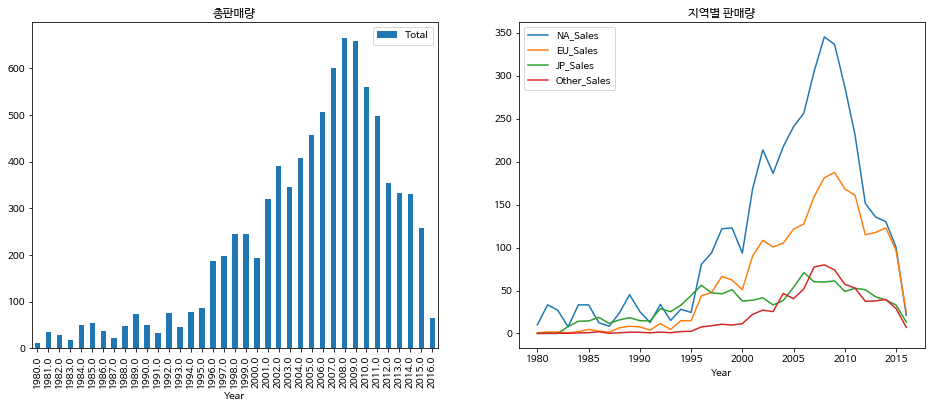

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


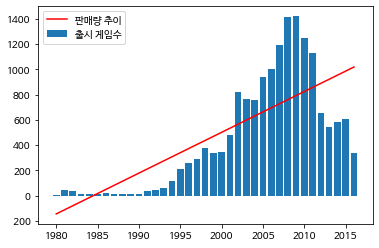

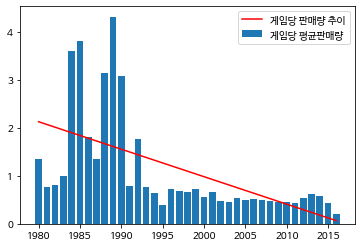

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition
import matplotlib as mpl
from scipy import stats

###########################################
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

##########################################

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
print('a <= Year <= b')
print('a 입력하세요')
a = int(1000)
print('b 입력하세요')
b = int(2016)
df[(df['Year'] < a )] = np.nan    # Year < 1000  =>  nan
df[(df['Year'] > b )] = np.nan    # Year > 1000  =>  nan
df = df.dropna(subset = ['Year'])  # Year 열 결측치 삭제
df = df.dropna(subset = ['Genre'])  # Genre 열 결측치 삭제
df = df.sort_values(by = ['Year'], ascending = True) # 연도별 오름차순
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_N = df
df2 = df[['Year', 'Total']].groupby(['Year']).sum()['Total'].reset_index()
df2['count']=df.value_counts('Year', sort = False ).reset_index()[0]

# print(df)
# print(df.groupby(['Year','Genre']).sum())


f,ax = plt.subplots(1,2,figsize = (16,6))
df[['Year', 'Total']].groupby(['Year']).sum().plot.bar(ax=ax[0])
ax[0].set_title('총판매량')
df[['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Year']).sum().plot.line(ax=ax[1])
ax[1].set_title('지역별 판매량')
plt.legend
plt.show()


res = stats.linregress(df2['Year'], df.value_counts('Year', sort = False ))
plt.bar(df2['Year'],df.value_counts('Year', sort = False ) ,label='출시 게임수')
plt.plot(df2['Year'], res.intercept + res.slope*df2['Year'], 'r', label='판매량 추이')
plt.legend()
plt.show()


res = stats.linregress(df2['Year'], df2['Total']/df2['count'])
plt.bar(df2['Year'],df2['Total']/df2['count'] ,label='게임당 평균판매량')
plt.plot(df2['Year'], res.intercept + res.slope*df2['Year'], 'r', label='게임당 판매량 추이')
plt.legend()
plt.show()
